# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales 2024-2
---
1. Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$
$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$
---

2. El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $ V(r) $ es el potencial en función de la distancia interatómica $ r $.
- $ \epsilon $ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $ \sigma $ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $ r $ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{2/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{2/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.


---
3.  El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres al español.


b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.




#Punto (1)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
v_m= float(input('Ingrese la velocidad de la moto: '))
a_p= float(input('Ingrese la aceleración del policia: '))

t= np.linspace(0,((2*v_m)/(a_p))+3)
y_m= []
y_p = []
for seg in t:
    y_m.append(v_m*seg)
    y_p.append(((a_p)*(seg**2))/(2))

plt.plot(t,y_m)
plt.plot(t,y_p)
plt.title('Encuentro de la moto y el policia')
plt.xlabel('t(s)')
plt.ylabel('x(m)')
print(f'Ambos se encuentran en {((2*v_m)/(a_p))} segundos ')

#Punto (2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#a

def Potencial_LJ(r,epsilon,sigma):

    termino = sigma/r
    return 4*epsilon*(termino**12 - termino**6)

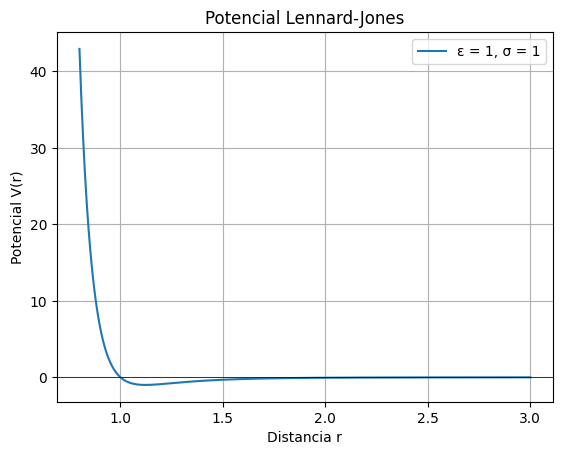

In [ ]:
Epsilon = 1
Sigma = Epsilon

distancia = np.linspace(0.8,3,500)

potencial = Potencial_LJ(distancia,Epsilon,Sigma)

plt.plot(distancia,potencial,label=f'ε = {Epsilon}, σ = {Sigma}')
plt.title('Potencial Lennard-Jones')
plt.xlabel('Distancia r')
plt.ylabel('Potencial V(r)')
plt.axhline(0, color='black',linewidth=0.5)
plt.legend()
plt.grid(True)
plt.show()

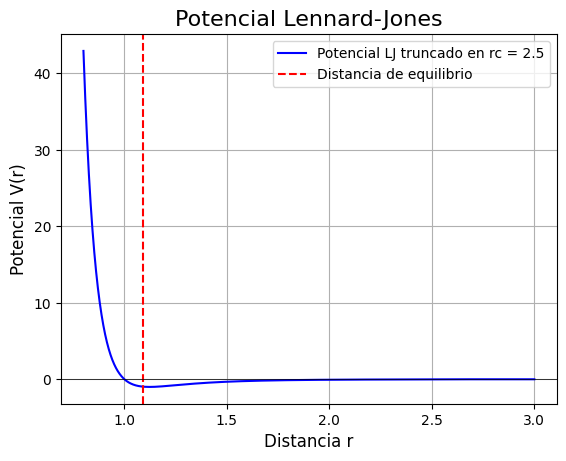

In [ ]:
#b

rc = 2.5*Sigma

def Potencial_truncado(r,epsilon,sigma,rc):
    v_r = np.where(r <= rc, 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6), 0)
    return v_r


distancia = np.linspace(0.8,3,500)
potencial_c = Potencial_truncado(distancia,Epsilon,Sigma,rc)

plt.plot(distancia,potencial_c,label=f'Potencial LJ truncado en rc = {rc}', color='blue')
r_eq = 2**(2/16) * Sigma
plt.axvline(x=r_eq, color='red', linestyle='--', label=f'Distancia de equilibrio')

plt.title('Potencial Lennard-Jones', fontsize=16)
plt.xlabel('Distancia r', fontsize=12)
plt.ylabel('Potencial V(r)', fontsize=12)
plt.axhline(0, color='black',linewidth=0.5)
plt.legend()
plt.grid(True)



plt.show()

#punto (3)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url =  "https://worldpopulationreview.com/country-rankings/average-height-by-country"
html_content = pd.read_html(url)
alturas = html_content[2]
#alturas.info()
alturas.head()

,Country,"Average Height, Boys, 19 yo (cm)",Girls 19 (cm),Boys 19 (in),Girls 19 (in),Boys 15 (cm),Girls 15 (cm),Boys 10 (cm),Girls 10 (cm),Boys 5 (cm),Girls 5 (cm)
0,Netherlands,183.78,170.36,6 ft.,5 ft. 7 in.,177.20,167.45,146.88,146.55,119.63,118.45
1,Montenegro,183.30,169.96,6 ft.,5 ft. 7 in.,177.50,167.42,146.81,146.33,119.58,118.49
2,Estonia,182.79,168.66,6 ft.,5 ft. 6 in.,176.41,166.12,146.03,145.21,116.94,115.74
3,Bosnia and Herzegovina,182.47,167.47,6 ft.,5 ft. 6 in.,174.21,164.85,144.97,144.55,118.32,116.38
4,Iceland,182.10,168.91,6 ft.,5 ft. 7 in.,174.80,165.61,145.59,145.06,118.49,116.48


In [ ]:
# a)
alturas_sin_in= alturas.drop(['Boys 19 (in)','Girls 19 (in)'], axis=1)
alturas_1= alturas_sin_in.set_axis(['País','Altura media, chicos, 19 años (cm)','Chicas 19 (cm)', 'Chicos 15 (cm)','Chicas 15',
                  'Chicos 10 (cm)','Chicas 10 (cm)','Chicos 5 (cm)','Chicas 5 (cm)'], axis=1)
alturas_1.head()

,País,"Altura media, chicos, 19 años (cm)",Chicas 19 (cm),Chicos 15 (cm),Chicas 15,Chicos 10 (cm),Chicas 10 (cm),Chicos 5 (cm),Chicas 5 (cm)
0,Netherlands,183.78,170.36,177.20,167.45,146.88,146.55,119.63,118.45
1,Montenegro,183.30,169.96,177.50,167.42,146.81,146.33,119.58,118.49
2,Estonia,182.79,168.66,176.41,166.12,146.03,145.21,116.94,115.74
3,Bosnia and Herzegovina,182.47,167.47,174.21,164.85,144.97,144.55,118.32,116.38
4,Iceland,182.10,168.91,174.80,165.61,145.59,145.06,118.49,116.48


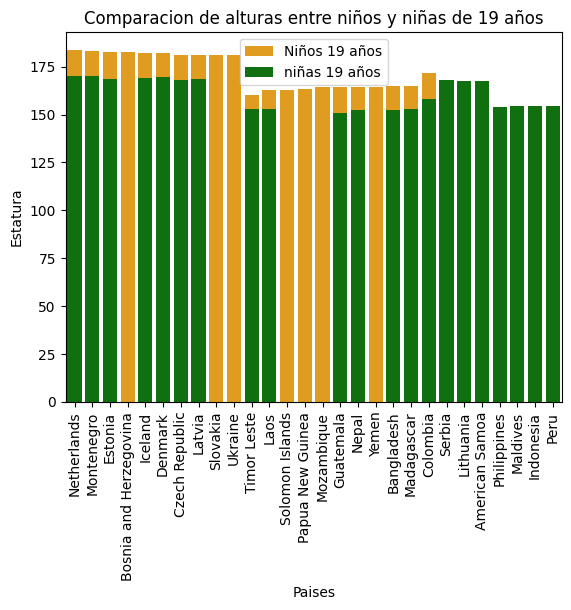

In [ ]:
# b) Grafico para niños y niñas de 19 años

altura_mayor_niño19 = alturas_1.sort_values(by = 'Altura media, chicos, 19 años (cm)', ascending= False).head(10)
altura_menor_niño19 = alturas_1.sort_values(by = 'Altura media, chicos, 19 años (cm)', ascending= True).head(10)
combinacion = pd.concat([altura_mayor_niño19,altura_menor_niño19 ])

altura_mayor_niña19 = alturas_1.sort_values(by = 'Chicas 19 (cm)',ascending= False).head(10)
altura_menor_niña19 = alturas_1.sort_values(by = 'Chicas 19 (cm)',ascending= True).head(10)
combinacion1 = pd.concat([altura_mayor_niña19,altura_menor_niña19])

#agregando a colombia

agregar = alturas_1[alturas_1['País']=='Colombia']

alturas_niños19 = pd.concat([combinacion , agregar])
alturas_niñas19 = pd.concat([combinacion1,agregar])

# Graficar
sns.barplot(x='País',y='Altura media, chicos, 19 años (cm)',data=alturas_niños19,color='orange', label= 'Niños 19 años' )
sns.barplot(x='País',y='Chicas 19 (cm)',data=alturas_niñas19,color='green',label= 'niñas 19 años')
plt.title('Comparacion de alturas entre niños y niñas de 19 años')
plt.xlabel('Paises')
plt.ylabel('Estatura')
plt.xticks(rotation=90)
plt.legend()
plt.show()

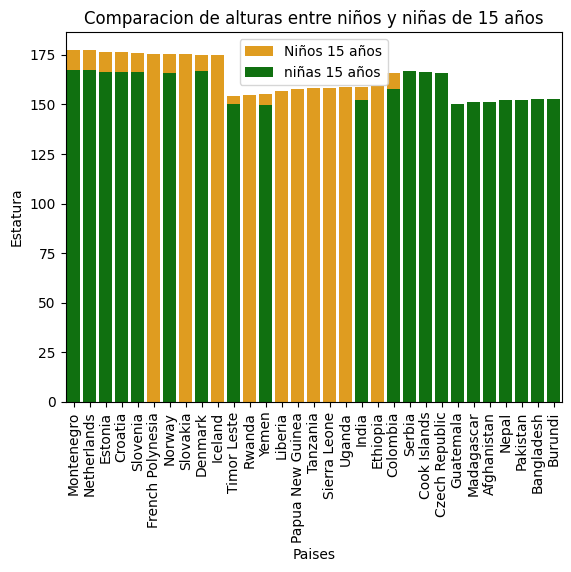

In [ ]:
# Grafico para niños y niñas de 15 años

altura_mayor_niño15 = alturas_1.sort_values(by = 'Chicos 15 (cm)', ascending= False).head(10)
altura_menor_niño15 = alturas_1.sort_values(by = 'Chicos 15 (cm)', ascending= True).head(10)
combinacion = pd.concat([altura_mayor_niño15,altura_menor_niño15 ])

altura_mayor_niña15 = alturas_1.sort_values(by = 'Chicas 15',ascending= False).head(10)
altura_menor_niña15 = alturas_1.sort_values(by = 'Chicas 15',ascending= True).head(10)
combinacion1 = pd.concat([altura_mayor_niña15,altura_menor_niña15])

alturas_niños15 = pd.concat([combinacion , agregar])
alturas_niñas15 = pd.concat([combinacion1, agregar])

sns.barplot(x='País',y='Chicos 15 (cm)',data=alturas_niños15,color='orange', label= 'Niños 15 años' )
sns.barplot(x='País',y='Chicas 15',data=alturas_niñas15,color='green',label= 'niñas 15 años')
plt.title('Comparacion de alturas entre niños y niñas de 15 años')
plt.xlabel('Paises')
plt.ylabel('Estatura')
plt.xticks(rotation=90)
plt.legend()
plt.show()

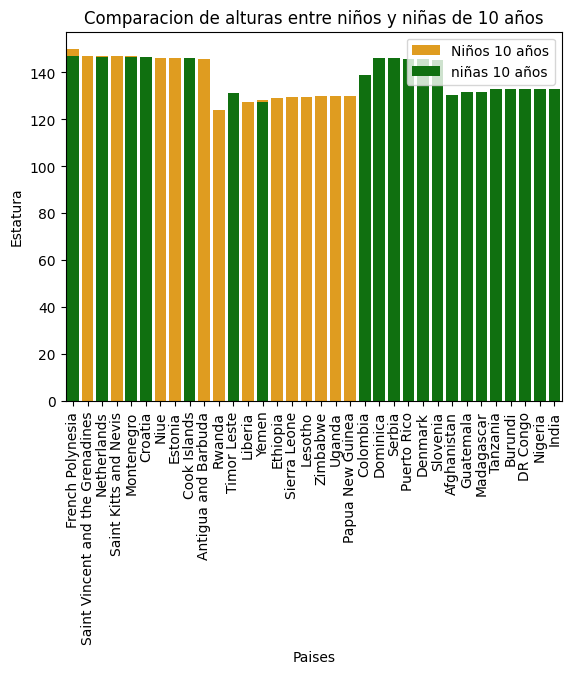

In [ ]:
# Grafico para niños y niñas de 10 años

altura_mayor_niño10 = alturas_1.sort_values(by = 'Chicos 10 (cm)', ascending= False).head(10)
altura_menor_niño10 = alturas_1.sort_values(by = 'Chicos 10 (cm)', ascending= True).head(10)
combinacion = pd.concat([altura_mayor_niño10,altura_menor_niño10])

altura_mayor_niña10 = alturas_1.sort_values(by = 'Chicas 10 (cm)',ascending= False).head(10)
altura_menor_niña10 = alturas_1.sort_values(by = 'Chicas 10 (cm)',ascending= True).head(10)
combinacion1 = pd.concat([altura_mayor_niña10,altura_menor_niña10])

alturas_niños10 = pd.concat([combinacion , agregar])
alturas_niñas10 = pd.concat([combinacion1, agregar])

sns.barplot(x='País',y='Chicos 10 (cm)',data=alturas_niños10,color='orange', label= 'Niños 10 años' )
sns.barplot(x='País',y='Chicas 10 (cm)',data=alturas_niñas10,color='green',label= 'niñas 10 años')
plt.title('Comparacion de alturas entre niños y niñas de 10 años')
plt.xlabel('Paises')
plt.ylabel('Estatura')
plt.xticks(rotation=90)
plt.legend()
plt.show()

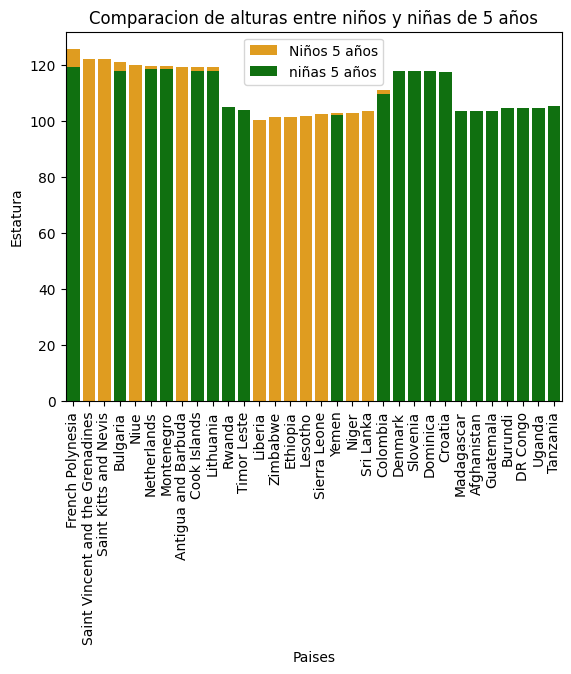

In [ ]:
# Grafico para niños y niñas de 5 años

altura_mayor_niño5 = alturas_1.sort_values(by = 'Chicos 5 (cm)', ascending= False).head(10)
altura_menor_niño5 = alturas_1.sort_values(by = 'Chicos 5 (cm)', ascending= True).head(10)
combinacion = pd.concat([altura_mayor_niño5,altura_menor_niño5])

altura_mayor_niña5 = alturas_1.sort_values(by = 'Chicas 5 (cm)',ascending= False).head(10)
altura_menor_niña5 = alturas_1.sort_values(by = 'Chicas 5 (cm)',ascending= True).head(10)
combinacion1 = pd.concat([altura_mayor_niña5,altura_menor_niña5])

alturas_niños5 = pd.concat([combinacion , agregar])
alturas_niñas5 = pd.concat([combinacion1, agregar])

sns.barplot(x='País',y='Chicos 5 (cm)',data=alturas_niños5,color='orange', label= 'Niños 5 años' )
sns.barplot(x='País',y='Chicas 5 (cm)',data=alturas_niñas5,color='green',label= 'niñas 5 años')
plt.title('Comparacion de alturas entre niños y niñas de 5 años')
plt.xlabel('Paises')
plt.ylabel('Estatura')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
# C
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"
html_content = pd.read_html(url)

income1 = html_content[0]
income = income1.rename(columns = {'Country':'País'})
income.head()

,País,Total Wealth (billions USD),GDP per Adult (USD),Wealth per Adult (USD),Share of World Wealth
0,United States,"$145,793","$91,340","$579,051",31.45%
1,China,"$85,107","$15,765","$76,639",18.36%
2,Japan,"$25,692","$45,449","$245,238",5.54%
3,Germany,"$17,489","$59,423","$256,985",3.77%
4,United Kingdom,"$16,261","$59,377","$309,375",3.51%


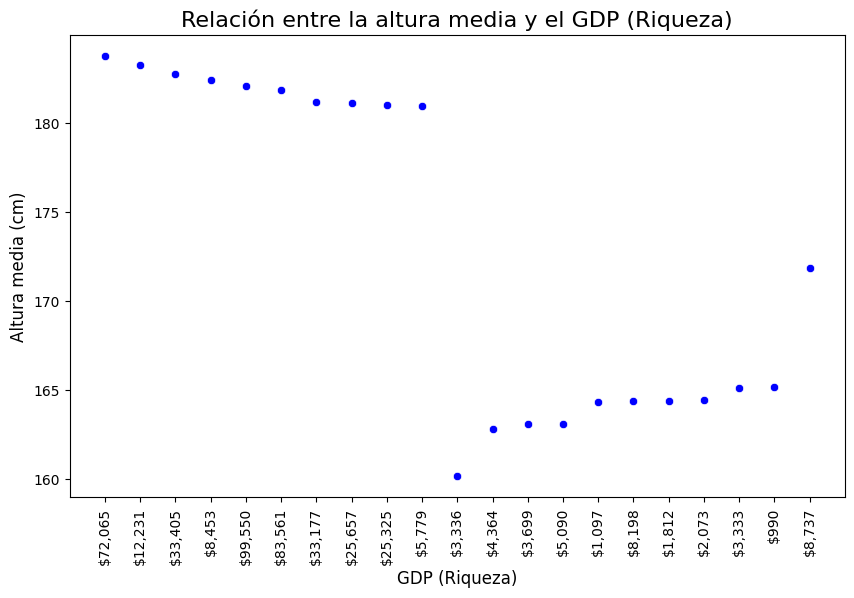

In [ ]:
data_merge = pd.merge(alturas_niños19,income, on='País' )

plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per Adult (USD)', y='Altura media, chicos, 19 años (cm)',data = data_merge, color='blue')
plt.title('Relación entre la altura media y el GDP (Riqueza)', fontsize=16)
plt.xlabel('GDP (Riqueza)', fontsize=12)
plt.ylabel('Altura media (cm)', fontsize=12)
plt.xticks(rotation=90)
plt.show()

***`Al parecer, según el gráfico anterior, sí hay una relación significativa entre la altura de una persona y su riqueza. Según los datos arrojados por la gráfica, se observa que, entre más ingresos tiene una persona, más alta es. `***